In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('ipl_matches.csv')

In [4]:
df['Season'] = df['Season'].str.replace('IPL-', '')
df['Season'] = df['Season'].astype(int)

In [5]:
# Show first 5 rows
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
#Get shape of the dataset
df.shape

(756, 18)

In [7]:
# List all columns
df.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [8]:
#Data types of each column
df.dtypes

id                  int64
Season              int32
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [9]:
#Basic stats for numeric columns
df.describe()

,id,Season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [10]:
# STEP 2: Data Cleaning
from sklearn.preprocessing import LabelEncoder

In [11]:
# Check missing values again
print("\n Missing values before cleaning:")
print(df.isnull().sum())


 Missing values before cleaning:
id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64


In [12]:
# Drop rows where 'winner' is NaN (no result matches)
df =df.dropna(subset=['winner'])

In [13]:
#Fill other missing values (like umpire columns) with 'Unknown'
df = df.fillna('Unknown')

In [14]:
print("Missing values after cleaning:")
print(df.isnull().sum())

Missing values after cleaning:
id                 0
Season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64


In [15]:
#Check for duplicate rows
df.duplicated().sum()

0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 752 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               752 non-null    int64 
 1   Season           752 non-null    int32 
 2   city             752 non-null    object
 3   date             752 non-null    object
 4   team1            752 non-null    object
 5   team2            752 non-null    object
 6   toss_winner      752 non-null    object
 7   toss_decision    752 non-null    object
 8   result           752 non-null    object
 9   dl_applied       752 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      752 non-null    int64 
 12  win_by_wickets   752 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            752 non-null    object
 15  umpire1          752 non-null    object
 16  umpire2          752 non-null    object
 17  umpire3          752 non-null    object


In [17]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_cols = ['team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'venue', 'city']

# Initialize encoder
le = LabelEncoder()

# Encode each column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Check first few rows after encoding
print(df[categorical_cols].head())

   team1  team2  toss_winner  toss_decision  winner  venue  city
0     14     13           13              1      14     28    14
1      8     11           11              1      11     21    26
2      4      7            7              1       7     31    28
3     11      5            5              1       5     13    15
4     13      3           13              0      13     17     2


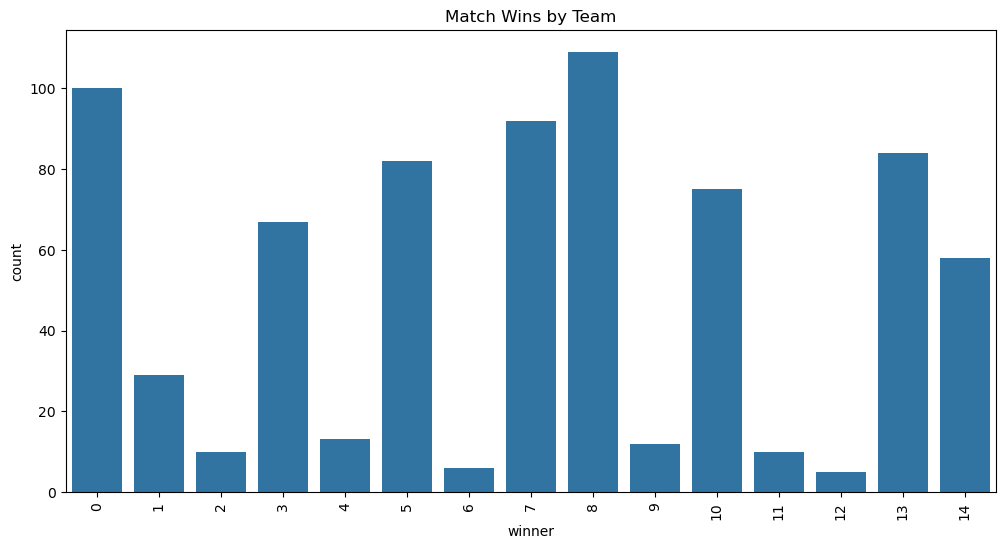

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(x='winner', data=df)
plt.xticks(rotation=90)
plt.title('Match Wins by Team')
plt.show()


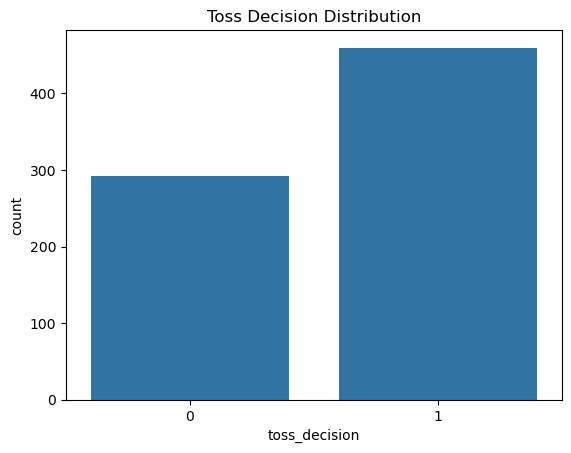

In [19]:
sns.countplot(x='toss_decision', data=df)
plt.title('Toss Decision Distribution')
plt.show()


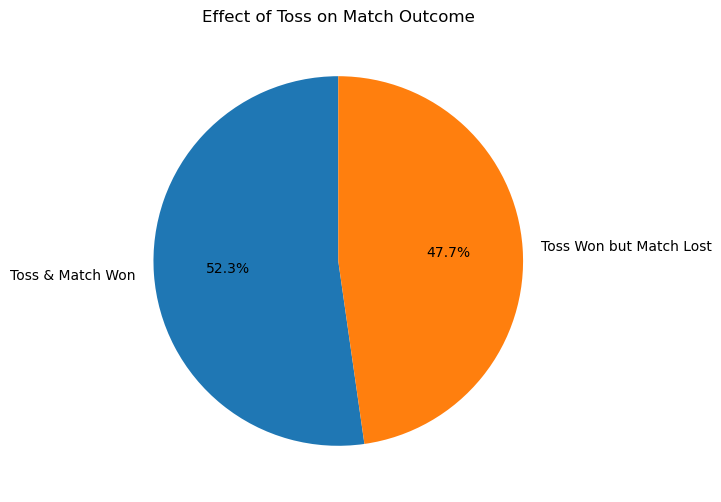

In [21]:
toss_win_match_win = df[df['toss_winner'] == df['winner']]
toss_win_match_lose = df[df['toss_winner'] != df['winner']]

labels = ['Toss & Match Won', 'Toss Won but Match Lost']
sizes = [len(toss_win_match_win), len(toss_win_match_lose)]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Effect of Toss on Match Outcome')
plt.show()


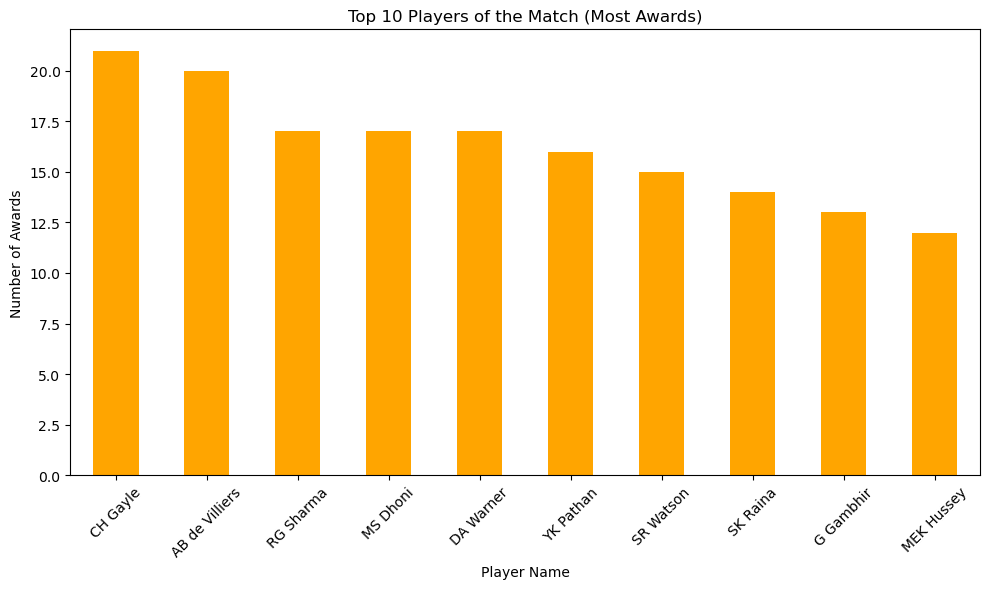

In [23]:

top_players = df['player_of_match'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
top_players.plot(kind='bar', color='orange')
plt.title('Top 10 Players of the Match (Most Awards)')
plt.xlabel('Player Name')
plt.ylabel('Number of Awards')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


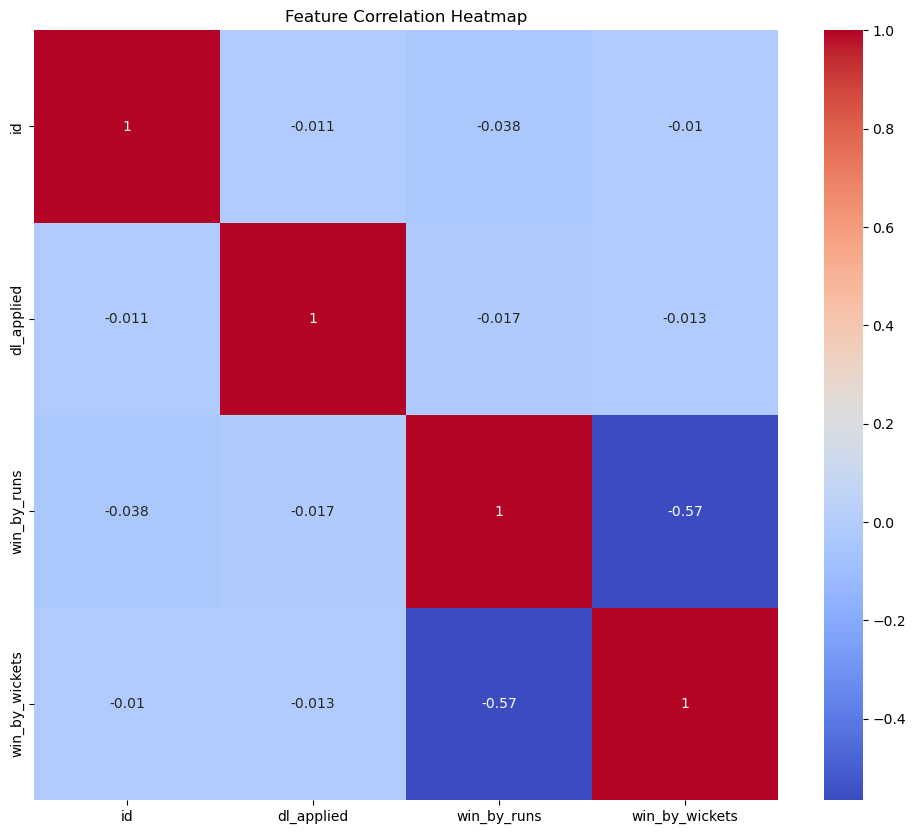

In [24]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Now plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [26]:
#sparating th edata and lables
features = df.drop(['winner', 'date', 'player_of_match', 'result','umpire1', 'umpire2','umpire3'],axis=1)
target= df['winner']
print("features :", features.shape)
print("target:", target.shape)

features : (752, 11)
target: (752,)


In [27]:
from sklearn.preprocessing import StandardScaler

# Drop non-numeric and ID columns
features = df.drop(['winner', 'date', 'player_of_match', 'result','umpire1', 'umpire2','umpire3'], axis=1)

# Encode categorical columns
features = pd.get_dummies(features, drop_first=True)

# Now apply StandardScaler
scaler = StandardScaler()
scaler.fit(features) 

StandardScaler()

In [28]:
standardized_data = scaler.transform(features)

In [29]:
print(standardized_data)

[[-0.51660035  1.05897127 -0.10384553 ...  0.92120255 -0.99482865
   0.5966791 ]
 [-0.51631073  1.05897127  1.32466365 ... -0.56829561  1.0725926
  -0.01774163]
 [-0.51602112  1.05897127  1.56274851 ... -0.56829561  1.95863027
   0.86000227]
 ...
 [ 2.7884908   1.65325962  2.03891824 ... -0.56829561 -0.40413687
  -1.86100383]
 [ 2.78878042  1.65325962  2.03891824 ... -0.56829561  0.7772467
  -1.86100383]
 [ 2.78907003  1.65325962 -0.10384553 ... -0.52573852 -0.99482865
   0.68445349]]


In [30]:
features = standardized_data
target =  df['winner']

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (601, 11)
Testing set shape: (151, 11)


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predict on test data
y_pred_test = log_model.predict(X_test)

# Evaluation
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test, zero_division=0))


Logistic Regression
Accuracy: 0.31788079470198677
Confusion Matrix:
 [[10  3  0  2  0  1  0  0  2  0  0  0  0  0  0]
 [ 6  0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  1  0  0  0  0  0  1]
 [ 7  1  0  1  1  0  0  0  0  0  1  0  0  2  0]
 [ 0  0  0  1  0  0  0  0  1  0  0  0  0  0  0]
 [ 3  0  0  1  0  4  0  3  4  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 2  1  0  3  1  0  0 10  3  0  0  0  0  1  0]
 [ 3  0  0  0  0  1  0  4  8  0  1  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  3  5  0  5  0  0  4  0]
 [ 0  0  0  0  0  0  0  1  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  2  3  0  2  0  0  7  0]
 [ 0  0  0  0  0  0  0  2  3  0  0  0  0  1  3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.56      0.36        18
           1       0.00      0.00      0.00         8
           2       0.00

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred_test_svm = svm_model.predict(X_test)

# Evaluation
print("SVM")
print("Accuracy:", accuracy_score(y_test, y_pred_test_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_test_svm, zero_division=0))


SVM
Accuracy: 0.5099337748344371
Confusion Matrix:
 [[14  0  0  1  0  2  0  1  0  0  0  0  0  0  0]
 [ 6  1  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  1  1  0  0  0  0  0  0]
 [ 8  0  0  2  0  2  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  1  0  0  0  0  1  0  0  0  0  0  0]
 [ 1  0  0  3  0  7  0  2  3  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  2  0 15  2  0  1  0  0  0  0]
 [ 1  0  0  0  0  1  0  3 13  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  2  0 12  0  0  3  0]
 [ 0  0  0  0  0  0  0  1  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  2  0  4  0  0  6  2]
 [ 0  0  0  0  0  0  0  1  1  0  0  0  0  0  7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.78      0.54        18
           1       1.00      0.12      0.22         8
           2       0.00      0.00      0

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

y_pred_train_knn = knn_model.predict(X_train)

print("KNN")
print("Accuracy:", accuracy_score(y_train, y_pred_train_knn))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train_knn))
print("Classification Report:\n", classification_report(y_train, y_pred_train_knn, zero_division=0))


KNN
Accuracy: 0.6256239600665557
Confusion Matrix:
 [[72  0  0  5  0  3  0  1  1  0  0  0  0  0  0]
 [ 7 12  0  1  0  1  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 9  3  0 35  1  3  0  1  1  0  0  0  0  1  0]
 [ 1  0  0  0  7  1  0  1  1  0  0  0  0  0  0]
 [ 5  0  0  4  3 46  0  3  3  0  1  0  0  0  0]
 [ 0  0  0  0  0  1  0  2  1  0  1  0  0  0  0]
 [ 1  0  0  1  2  8  1 44 10  0  3  0  0  0  1]
 [ 3  0  0  1  0  7  0 18 54  1  4  0  0  3  0]
 [ 0  0  0  0  0  2  0  3  5  1  0  0  0  0  0]
 [ 0  0  0  2  0  5  0  6  9  2 30  0  0  1  0]
 [ 0  0  0  0  0  1  0  2  1  0  0  4  0  0  0]
 [ 0  0  0  1  0  0  0  0  1  0  0  0  0  1  1]
 [ 1  0  0  0  1  0  0  6  5  0  6  1  0 45  4]
 [ 0  0  0  2  0  0  0  2  5  0  3  1  0 10 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.88      0.78        82
           1       0.80      0.57      0.67        21
           2       0.00      0.00      0

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Predict on test data
y_pred_test_dt = dt_model.predict(X_test)

# Evaluation
print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_test_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_test_dt, zero_division=0))


Decision Tree
Accuracy: 0.8079470198675497
Confusion Matrix:
 [[11  2  0  0  0  3  0  0  0  0  0  1  0  0  1]
 [ 2  4  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0 16  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  2  0  1  0  0  0]
 [ 1  0  0  0  0  0  0  0 17  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0 18  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  1  0  0 12  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.61      0.58        18
           1       0.67      0.50      0.57         8
           2       0.67      0

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_test_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_test_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_test_rf, zero_division=0))


Random Forest
Accuracy: 0.7748344370860927
Confusion Matrix:
 [[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  4  0  1  0  0  1  0  0  0  0  0  0]
 [ 0  1  3  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0 10  0  2  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0 13  0  1  1  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0 17  2  0  1  0  0  0  0]
 [ 0  0  0  0  0  1  0  0 16  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  4  0 15  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  1  0  0  1  0  1  0  0 10  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       0.67      0.25      0.36         8
           2       1.00      0

In [57]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred_test_xgb = xgb_model.predict(X_test)

# Evaluate on test data
print(" XGBoost")
print("Accuracy:", accuracy_score(y_test, y_pred_test_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_test_xgb, zero_division=0))


 XGBoost
Accuracy: 0.9536423841059603
Confusion Matrix:
 [[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  7  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  1  0  0  0  1  0  0  0  0  0  0]
 [ 1  0  0 12  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 21  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 18  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 19  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 15  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       1.00      0.88      0.93         8
           2       1.00      0.60  

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# Train KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

from xgboost import XGBClassifier
# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)


# Predict on test data
y_pred_log = log_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Collect results using y_test for evaluation
results = {
    'Model': ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    'Precision': [
        precision_score(y_test, y_pred_log, average='macro', zero_division=0),
        precision_score(y_test, y_pred_svm, average='macro', zero_division=0),
        precision_score(y_test, y_pred_knn, average='macro', zero_division=0),
        precision_score(y_test, y_pred_dt, average='macro', zero_division=0),
        precision_score(y_test, y_pred_rf, average='macro', zero_division=0),
        precision_score(y_test, y_pred_xgb, average='macro', zero_division=0)
    ],
    'Recall': [
        recall_score(y_test, y_pred_log, average='macro', zero_division=0),
        recall_score(y_test, y_pred_svm, average='macro', zero_division=0),
        recall_score(y_test, y_pred_knn, average='macro', zero_division=0),
        recall_score(y_test, y_pred_dt, average='macro', zero_division=0),
        recall_score(y_test, y_pred_rf, average='macro', zero_division=0),
        recall_score(y_test, y_pred_xgb, average='macro', zero_division=0)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_log, average='macro', zero_division=0),
        f1_score(y_test, y_pred_svm, average='macro', zero_division=0),
        f1_score(y_test, y_pred_knn, average='macro', zero_division=0),
        f1_score(y_test, y_pred_dt, average='macro', zero_division=0),
        f1_score(y_test, y_pred_rf, average='macro', zero_division=0),
        f1_score(y_test, y_pred_xgb, average='macro', zero_division=0)
    ]
}

# Convert to DataFrame for easy comparison
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False)

# Display results
print(results_df)



C:\Users\sakth\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [10:26:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                 Model  Accuracy  Precision    Recall  F1 Score
5              XGBoost  0.953642   0.821944  0.823205  0.816373
3        Decision Tree  0.807947   0.704422  0.712595  0.698670
4        Random Forest  0.774834   0.664351  0.633268  0.636285
1                  SVM  0.509934   0.344207  0.312178  0.297415
2                  KNN  0.403974   0.310240  0.308772  0.296877
0  Logistic Regression  0.317881   0.223450  0.189227  0.184380


In [41]:
from sklearn.model_selection import GridSearchCV


In [42]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0]
}


In [43]:
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


C:\Users\sakth\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [10:27:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constrain...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 6, 10], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=2)

In [53]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Best Cross-Validation Score: 0.9400912106135987


In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)

print("Tuned XGBoost Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test, zero_division=0))


Tuned XGBoost Evaluation
Accuracy: 0.9602649006622517
Confusion Matrix:
 [[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  1  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0 13  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 21  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 17  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 20  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 15  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         8
           2       

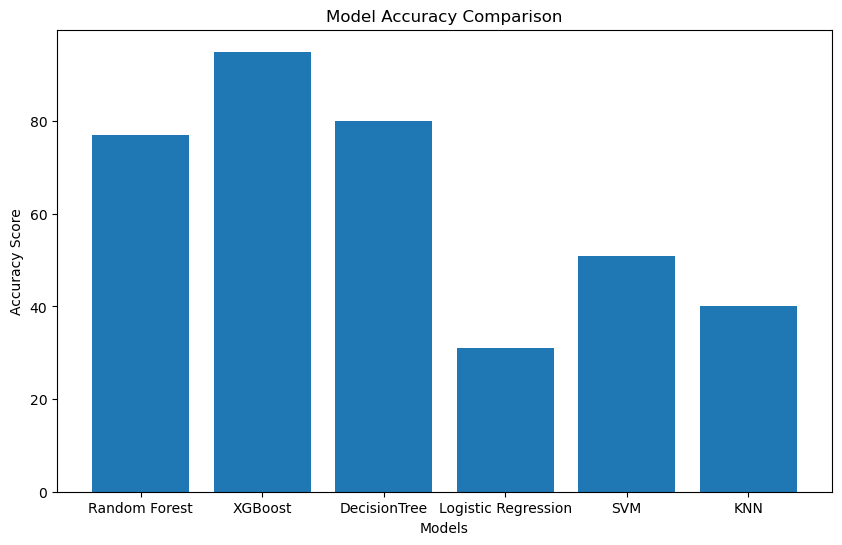

In [46]:
import matplotlib.pyplot as plt

# Accuracy scores
model1_score = 75
model2_score = 95
model3_score = 80
model4_score = 31
model5_score = 51
model6_score = 40


# Model names
models = ['Random Forest', 'XGBoost', 'DecisionTree', 'Logistic Regression','SVM','KNN']

# Scores list
scores = [model1_score, model2_score, model3_score, model4_score,model5_score,model6_score ]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(models, scores)

# Title and labels
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.xlabel('Models')

# Show plot
plt.show()

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Train all models
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

svm_model = SVC()
svm_model.fit(X_train, y_train)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [50]:
from sklearn.metrics import accuracy_score

# Predict using each model on X_test
y_pred_log = log_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Calculate accuracy scores using y_test
acc_log = accuracy_score(y_test, y_pred_log) * 100
acc_svm = accuracy_score(y_test, y_pred_svm) * 100
acc_knn = accuracy_score(y_test, y_pred_knn) * 100
acc_dt = accuracy_score(y_test, y_pred_dt) * 100
acc_rf = accuracy_score(y_test, y_pred_rf) * 100
acc_xgb = accuracy_score(y_test, y_pred_xgb) * 100

# Display all
print("Accuracy Scores on Test Set:")
print(f"Logistic Regression: {acc_log:.2f}%")
print(f"SVM: {acc_svm:.2f}%")
print(f"KNN: {acc_knn:.2f}%")
print(f"Decision Tree: {acc_dt:.2f}%")
print(f"Random Forest: {acc_rf:.2f}%")
print(f"XGBoost: {acc_xgb:.2f}%")



Accuracy Scores on Test Set:
Logistic Regression: 31.79%
SVM: 50.99%
KNN: 40.40%
Decision Tree: 80.13%
Random Forest: 75.50%
XGBoost: 95.36%
